In [44]:
pwd

'D:\\github\\COVID-2019\\covid-19'

In [45]:
import pandas as pd

In [46]:
import matplotlib.pyplot as plt

# 出生人口死亡分布曲线

In [329]:
life_table = pd.read_excel('Table01.xlsx', skiprows=2)
life_table['death_rate'] = life_table['dx']/100000
life_table.index.name = 'death_year'
life_table.head()

,Age,qx,lx,dx,Lx,Tx,ex,death_rate
death_year,,,,,,,,
0,0–1,0.005575,100000.000000,557.462341,99513.335938,7884823.0,78.848228,0.005575
1,1–2,0.000379,99442.539062,37.690670,99423.695312,7785309.5,78.289528,0.000377
2,2–3,0.000234,99404.851562,23.219563,99393.242188,7685886.0,77.319023,0.000232
3,3–4,0.000180,99381.632812,17.871410,99372.695312,7586492.5,76.336967,0.000179
4,4–5,0.000145,99363.757812,14.412253,99356.546875,7487120.0,75.350609,0.000144


In [330]:
life_table.tail()

,Age,qx,lx,dx,Lx,Tx,ex,death_rate
death_year,,,,,,,,
99,99–100,0.308767,3024.207520,933.775085,2557.319824,7253.081055,2.398341,0.009338
100,100 and over,1.000000,2090.432373,600.000000,4695.761230,4695.761230,2.246311,0.006000
101,100 and over,1.000000,2090.432373,300.000000,4695.761230,4695.761230,2.246311,0.003000
102,100 and over,1.000000,2090.432373,100.000000,4695.761230,4695.761230,2.246311,0.001000
103,100 and over,1.000000,2090.432373,10.000000,4695.761230,4695.761230,2.246311,0.000100


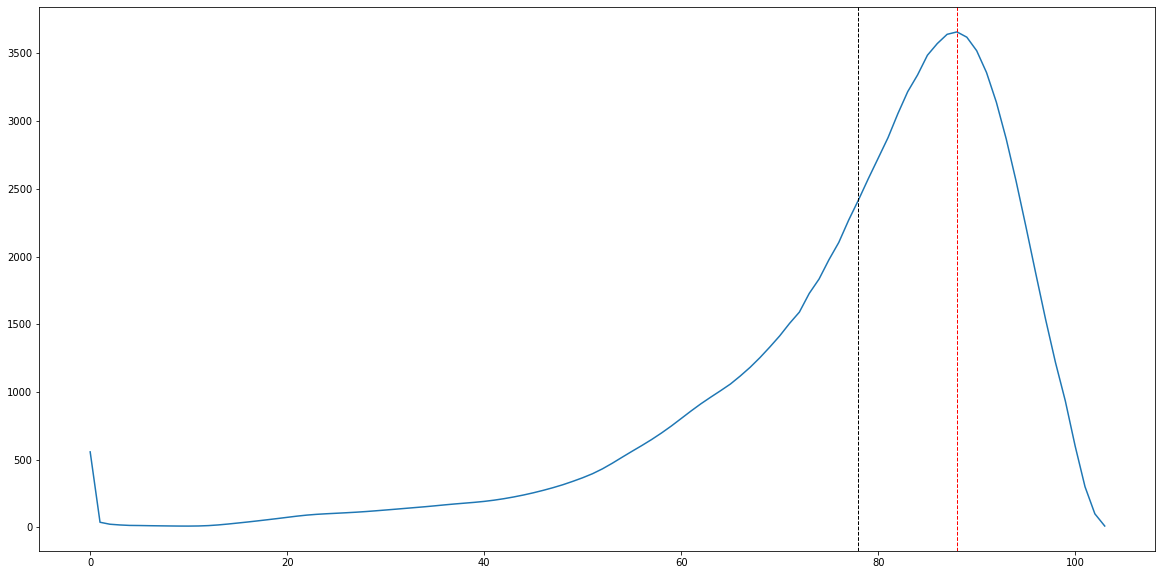

In [331]:
figure, ax = plt.subplots(figsize=(20,10))
ax.plot(life_table['dx'])
ax.axvline(x=78, color='black', linewidth='1', linestyle='--')
ax.axvline(x=88, color='r', linewidth='1', linestyle='--')
plt.show()

# 预期寿命修正

- 上图是2019年的死亡分布曲线，预期寿命78，可以看到死亡高峰对应的是88岁。
- 历史上死亡曲线与之未必相符，我们根据历史每年的预期寿命与2019的做个差值，找到其合理的权重。

In [332]:
life_expectancy = pd.read_csv('life_expectancy.csv', index_col=['Year'])
life_expectancy.head()

,life_expectancy
Year,
2020,77.0
2019,78.6
2018,78.6
2017,78.6
2016,78.7


In [333]:
life_expectancy['diff'] = (78.6 - life_expectancy['life_expectancy']).astype('int')

In [334]:
life_expectancy

,life_expectancy,diff
Year,,
2020,77.0,1
2019,78.6,0
2018,78.6,0
2017,78.6,0
2016,78.7,0
...,...,...
1921,60.8,17
1920,54.1,24
1919,54.7,23


# 总出生人口

In [335]:
# birth_sample = pd.read_csv('birth.csv',  index_col=['Year'])
# birth_sample.head()

In [336]:
# births = pd.DataFrame()
# births.index = range(1910,2020)
# births.index.name = 'Year'

In [337]:
# births = pd.concat([births, birth_sample],axis='columns')
# births.sort_index(ascending=False, inplace=True)
# births['Birth'] = births['Birth'].interpolate()


In [338]:
births = pd.read_csv('births.csv',  usecols=['Birth','Year'], index_col=['Year'])
births.head()

,Birth
Year,
2020,3613647.0
2019,3747540.0
2018,3791712.0
2017,3855500.0
2016,3945875.0


In [339]:
births.tail()

,Birth
Year,
1921,2941800.0
1920,2950000.0
1919,2953000.0
1918,2956000.0
1917,2959000.0


In [340]:
births.shape

(104, 1)

# 每年死亡人口计算

In [442]:
def get_death_of_year(year, use_life_expectancy=False):
    p_year = births.copy()
    # 每年出生的人到year这年的年龄
    p_year['death_year'] =  year- p_year.index
    if not use_life_expectancy:
        p_year = p_year.loc[ (p_year.index<=year) &(p_year.index>=1917 + year-2017)]
    else:
        p_year = p_year.loc[ (p_year.index<=year) &(p_year.index>=1930 + year-2017)]
    # 每年出生的人到year这年的年龄+由于预期寿命的修正
    p_year['death_year_new'] =  p_year['death_year']
    if use_life_expectancy:
        p_year['death_year_add'] =  life_expectancy.loc[p_year.index, 'diff']
        p_year['death_year_new'] =  p_year['death_year']+life_expectancy.loc[p_year.index, 'diff']
        # p_year = p_year.loc[(p_year['death_year_new']<=103)]
    # p_year = p_year.loc[ (p_year['death_year_new']>=0)]
    p_year.loc[p_year['death_year_new']>103, 'death_year_new'] = 103
    # print(p_year)
    
    p_year['death_rate'] = life_table.loc[p_year['death_year_new'],'death_rate'].tolist()
    p_year['deaths'] =  p_year['Birth']*p_year['death_rate']
    p_year.to_csv(str(year)+'.csv')
    death_year = sum( p_year['Birth']*p_year['death_rate'] )

    return death_year

## 不用预期寿命较正2018-2021 死亡人口

In [443]:
get_death_of_year(2017)

2905161.247970444

In [444]:
get_death_of_year(2018)

2910802.014759074

In [445]:
get_death_of_year(2019)

2918470.7867820035

In [446]:
get_death_of_year(2020)

2927870.020830343

## 用预期寿命较正2018-2021 死亡人口

In [447]:
get_death_of_year(2017, True)

2410266.128339334

In [448]:
get_death_of_year(2018, True)

2450434.3982783263

In [449]:
get_death_of_year(2019, True)

2492516.8281625262

In [450]:
get_death_of_year(2020, True)

2518775.2529869066

# 结论

### 1. 按照死亡分布曲线计算的死亡结果与真实值有gap，但我们并不关注这个gap，我们更关注死亡分布曲线计算的结果本身的增长趋势。
### 2. 不管用不用预期寿命较正，婴儿潮带来的出生人口增长在死亡分布曲线下被抹平了，在2020年并不会带来大量突增。